**两个函数**
- Gamma函数

对于正整数n,有

$\Gamma(n) = (n-1)!\Gamma(1) = (n-1)!$

- Beta函数

对于正整数m,n，有

$B(m,n) = \cfrac{\Gamma(m)\Gamma(n)}{\Gamma(m+n)}$

### 13种概率分布
https://mp.weixin.qq.com/s/RnAf1x7LBtPcxPi-iTWT3A

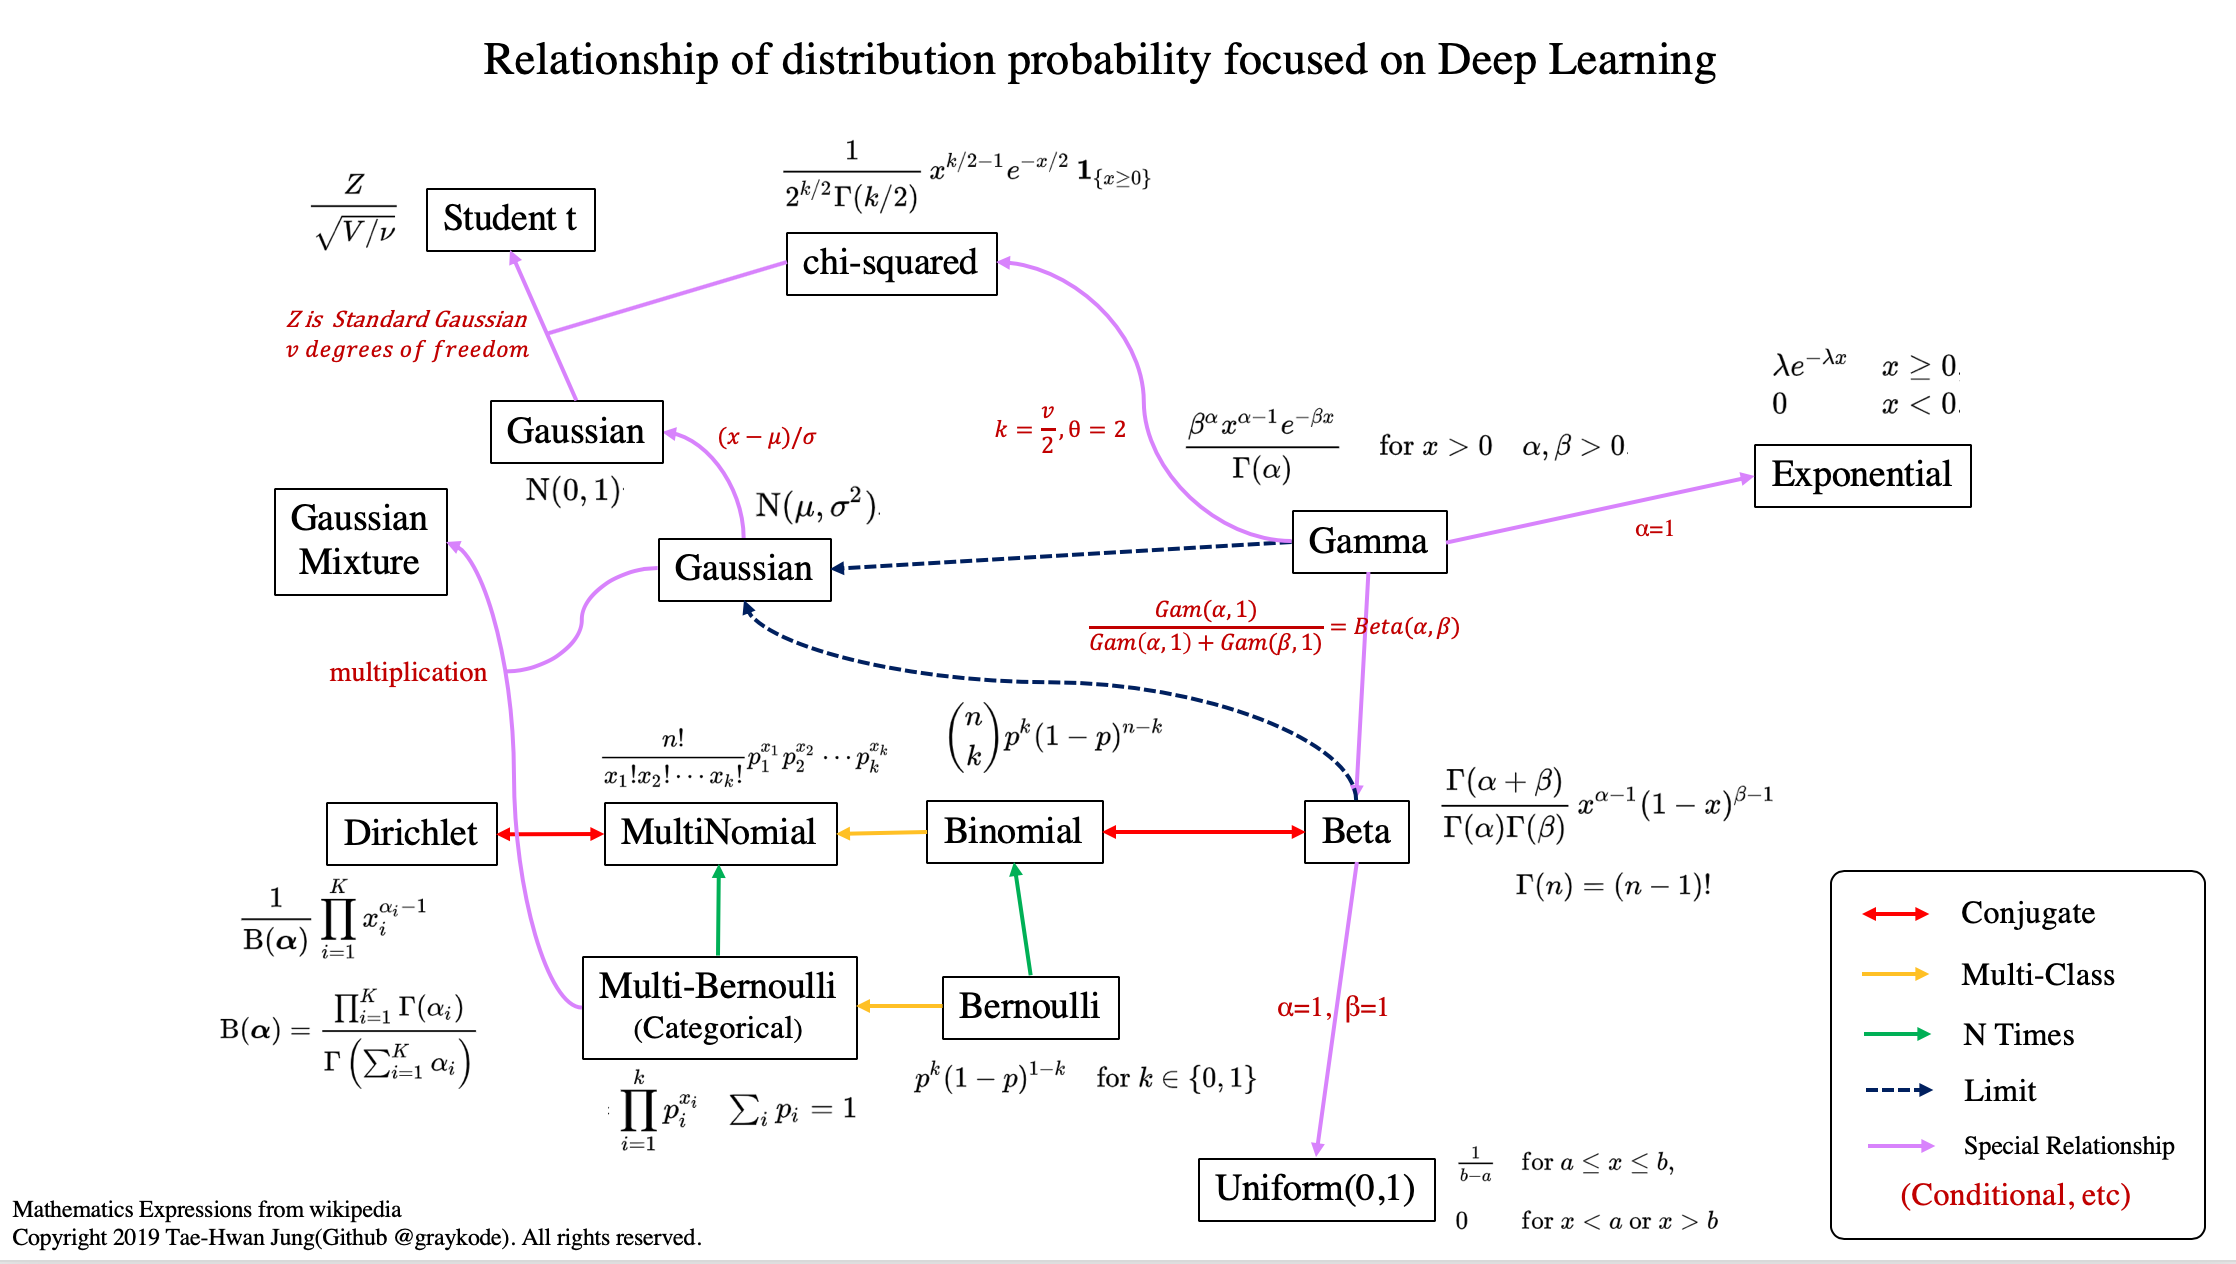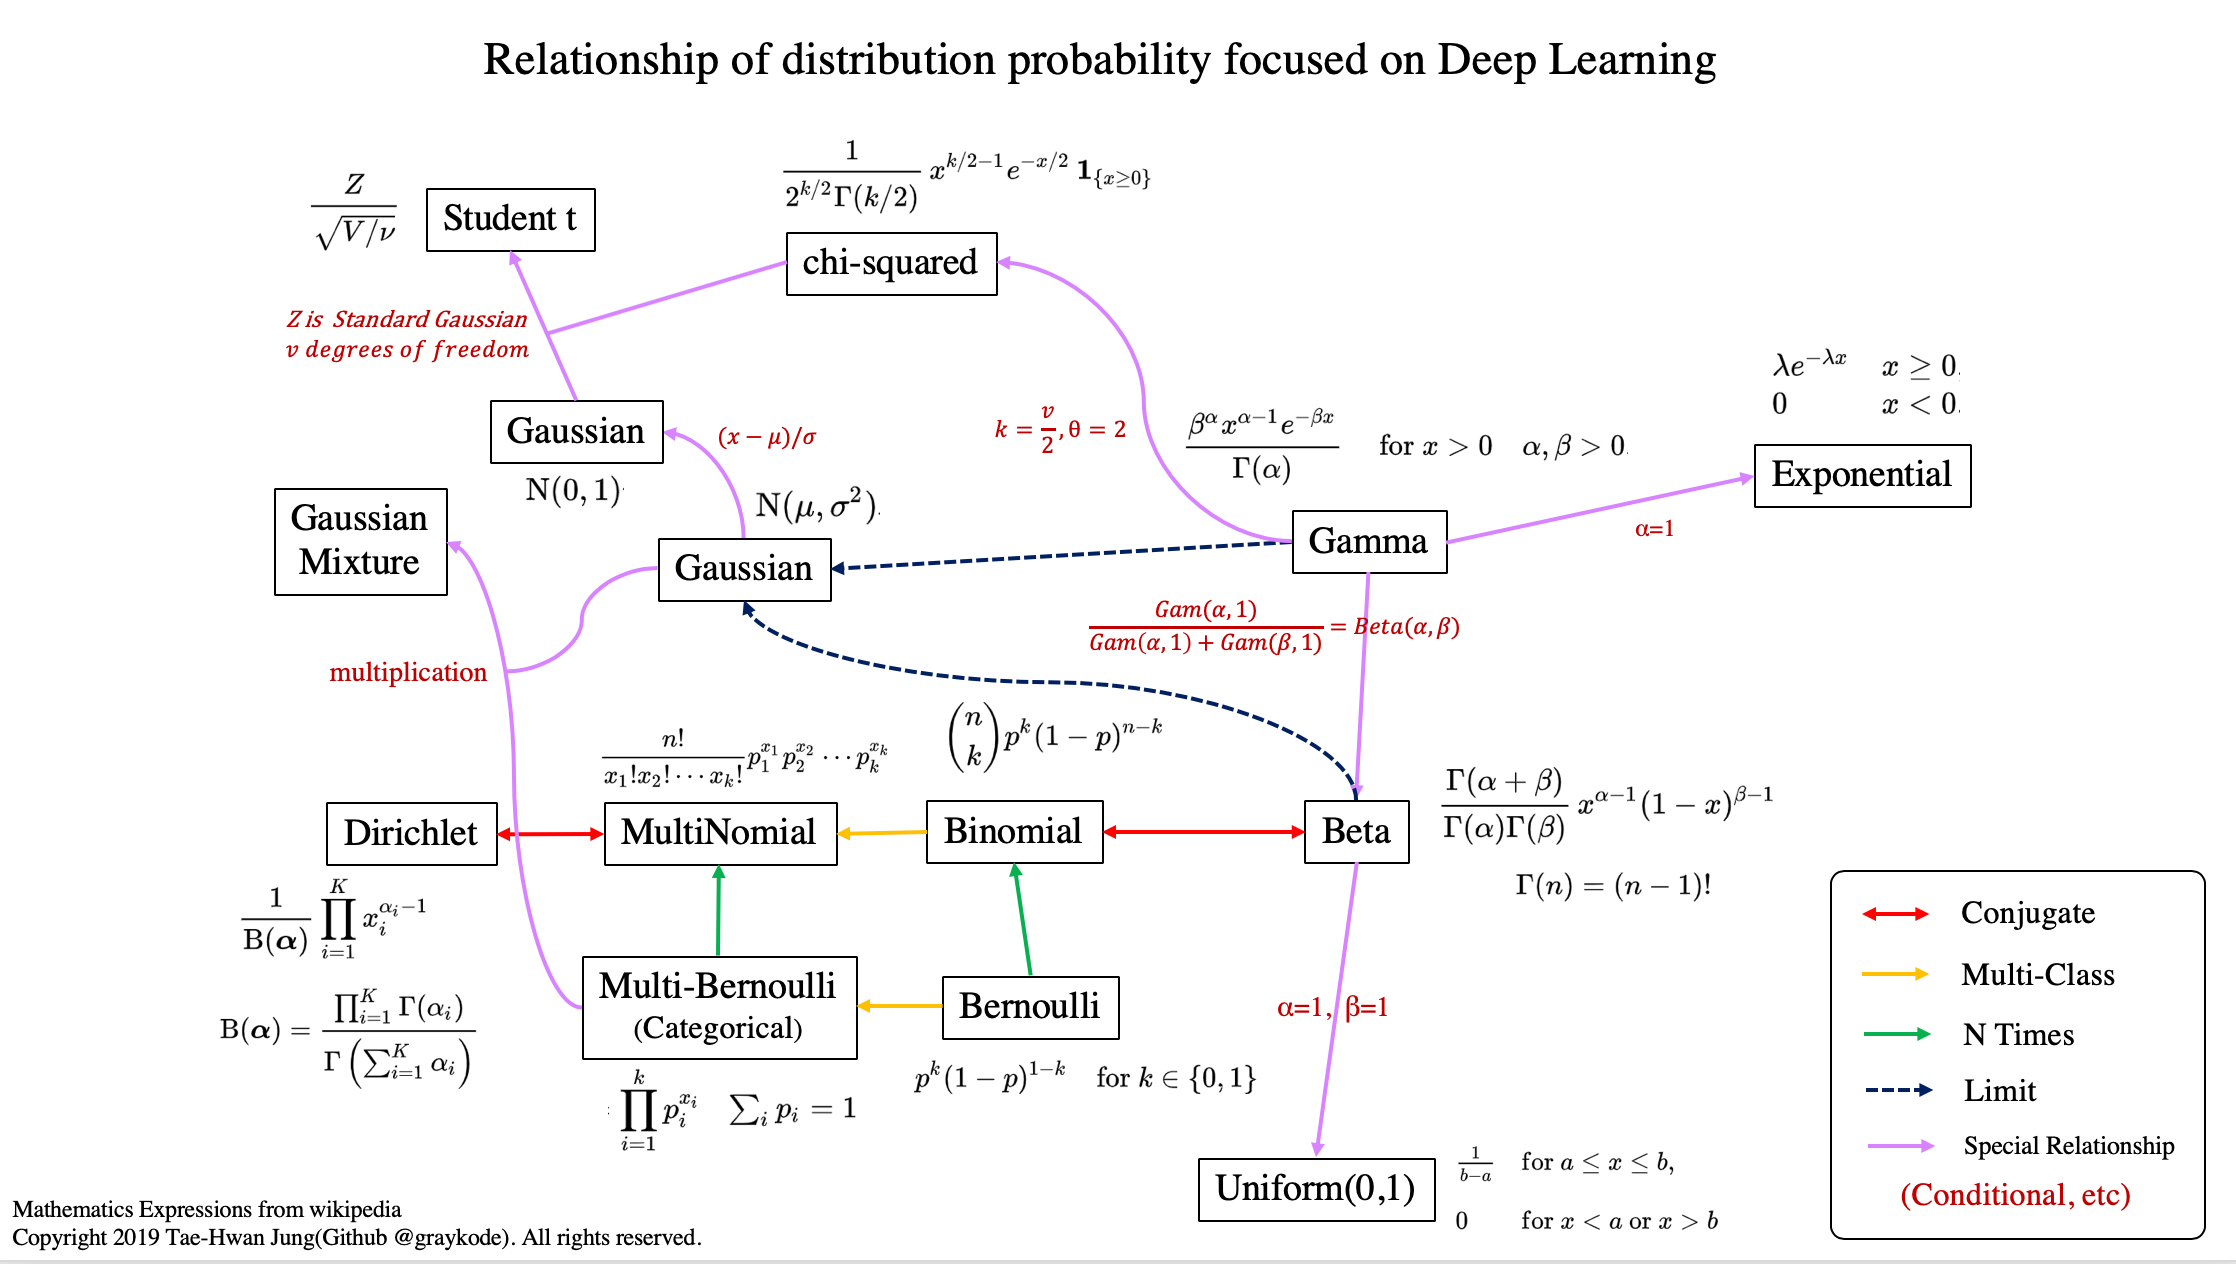

#### 均匀分布(连续）

均匀分布在 \[a，b] 上具有相同的概率值，就是均匀概率分布。

$ X \sim U(a,b) $

P.D.F.

$ f(x) = \cfrac{1}{b-a} \; a\le x \le b$

C.D.F.

$ P(X \le x) = \cfrac{x-a}{b-a} $

mean and standard variance

$ \mu = \cfrac{a+b}{2}\; \sigma = \cfrac{b-a}{\sqrt{12}} $

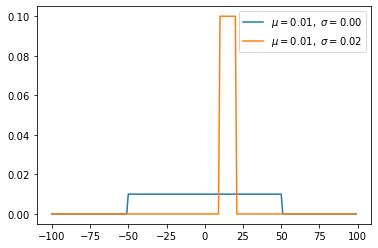

In [1]:
import numpy as np
from matplotlib import pyplot as plt

def uniform(x, a, b):

    y = [1 / (b - a) if a <= val and val <= b
                    else 0 for val in x]

    return x, y, np.mean(y), np.std(y)

x = np.arange(-100, 100) # define range of x
for ls in [(-50, 50), (10, 20)]:
    a, b = ls[0], ls[1]
    x, y, u, s = uniform(x, a, b)
    plt.plot(x, y, label=r'$\mu=%.2f,\ \sigma=%.2f$' % (u, s))

plt.legend()
plt.savefig('../figs/uniform.png')
plt.show()

#### 伯努利分布（离散）

$ X \sim B(1,p) \; or \; X\sim Bern(p) $

$ f(x\mid p) = p^x(1-p)^{1-x} $

$ \mu = p \; \sigma = \sqrt{p(1-p)}$

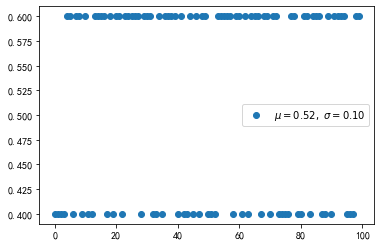

In [13]:
import random
import numpy as np
from matplotlib import pyplot as plt

def bernoulli(p, k):
    return p if k else 1 - p

n_experiment = 100
p = 0.6
x = np.arange(n_experiment)
y = []
for _ in range(n_experiment):
    pick = bernoulli(p, k=bool(random.getrandbits(1)))
    y.append(pick)

u, s = np.mean(y), np.std(y)
plt.scatter(x, y, label=r'$\mu=%.2f,\ \sigma=%.2f$' % (u, s))
plt.legend()
plt.savefig('../figs/bernoulli.png')
plt.show()

#### 二项分布

https://baike.baidu.com/item/%E4%BA%8C%E9%A1%B9%E5%88%86%E5%B8%83/1442377?fr=aladdin

**二项分布是$n$个独立的成功/失败试验中成功的次数$k$的离散概率分布，其中每次试验的成功概率为p**。

这样的单次成功/失败试验又称为伯努利试验。实际上，当n=1时，二项分布就是伯努利分布

$ X \sim B(n,p) \; or\; X \sim b(n,p) $

P.D.F.

$ P\{X = k\} = \binom{n}{k}p^k(1-p)^{n-k}, 其中 k= 1,2, \cdots, n$

$ \mu = np \; \sigma = \sqrt{np(1-p)}$

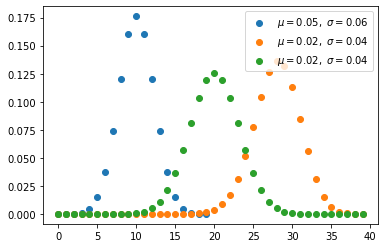

In [2]:
import numpy as np
from matplotlib import pyplot as plt

import operator as op
from functools import reduce

def const(n, r):
    r = min(r, n-r)
    numer = reduce(op.mul, range(n, n-r, -1), 1)
    denom = reduce(op.mul, range(1, r+1), 1)
    return numer / denom

def binomial(n, p):
    q = 1 - p
    y = [const(n, k) * (p ** k) * (q ** (n-k)) for k in range(n)]
    return y, np.mean(y), np.std(y)

for ls in [(0.5, 20), (0.7, 40), (0.5, 40)]:
    p, n_experiment = ls[0], ls[1]
    x = np.arange(n_experiment)
    y, u, s = binomial(n_experiment, p)
    plt.scatter(x, y, label=r'$\mu=%.2f,\ \sigma=%.2f$' % (u, s))

plt.legend(loc = "upper right")
plt.savefig('../figs/binomial.png')
plt.show()

#### 多伯努利分布（离散）（分类分布）

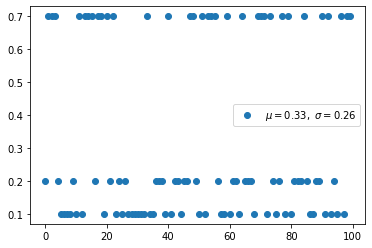

In [5]:
import random
import numpy as np
from matplotlib import pyplot as plt

def categorical(p, k):
    return p[k]

n_experiment = 100
p = [0.2, 0.1, 0.7]
x = np.arange(n_experiment)
y = []
for _ in range(n_experiment):
    pick = categorical(p, k=random.randint(0, len(p) - 1))
    y.append(pick)

u, s = np.mean(y), np.std(y)
plt.scatter(x, y, label=r'$\mu=%.2f,\ \sigma=%.2f$' % (u, s))
plt.legend()
plt.savefig('../figs/categorical.png')
plt.show()

#### 多项式分布 (Multinomial Distribution)

多项式分布是二项式分布的推广。

二项分布的典型例子是扔硬币，硬币正面朝上概率为p, **重复扔n次硬币，k次为正面的概率即为一个二项分布概率**。

把二项分布公式推广至多种状态，就得到了多项分布。

##### 定义

如果一个随机变量$ X = (X_1, X_2, \cdots, X_n) $满足下列条件：

- $X_i \ge 0 (1\le i \le n)$, 且$X_1+X_2+\cdots +X_n = N$;

- 设$m_1, m_2, \cdots, m_n$为任意非负整数，且$m_1+m_2+\cdots +m_n = N$;

${X_1=m_1, X_2=m_2, \cdots, X_n=m_n}$的概率为:

$ P{X_1=m_1, X_2=m_2, \cdots, X_n=m_n} = \cfrac{N!}{m_1!m_2!\cdots m_n!}p_1^{m_1}p_2^{m_2}\cdots p_n^{m_n} $

其中，$p_i \ge 0 (1\le i \le n), p_1+p_2+\cdots +p_n = 1$

则称随机变量$ X = (X_1, X_2, \cdots, X_n) $服从多项分布，记作：

$ X \sim PN(N: p_1,p_2, \cdots, p_n)$

##### 例子

某随机实验如果有$k$个可能结局$A_1,A_2,\cdots, A_k$，分别将他们的出现次数记为随机变量${X_1,X_2,\cdots, X_k}$，它们的概率分布分别是$p_1, p_2，\cdots, p_k$，那么在$n$次采样的总结果中，A1出现n1次、A2出现n2次、…、Ak出现nk次的这种事件的出现概率P有下面公式：

$ P\{X_1=n_1, X_2=n_2, \cdots, X_k=n_k\} = \cfrac{n!}{n_1!n_2!\cdots n_k!}p_1^{n_1}p_2^{n_2}\cdots p_k^{n_k},\; \sum_{i=1}^k{n_i}=n, \; \sum_{i=1}^k{p_i} = 1 $

or

$ P\{X_1=n_1, X_2=n_2, \cdots, X_k=n_k\} = n! \prod_{i=1}^k{\cfrac{p_i^{n_i}}{n_i!}}, \; \sum_{i=1}^k{n_i}=n, \; \sum_{i=1}^k{p_i} = 1 $

##### Code

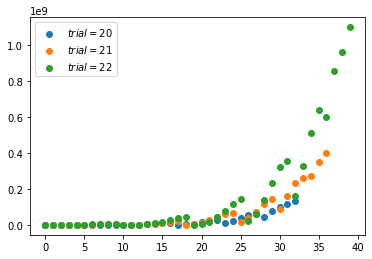

In [6]:
import numpy as np
from matplotlib import pyplot as plt

import operator as op
from functools import reduce

def factorial(n):
    return reduce(op.mul, range(1, n + 1), 1)

def const(n, a, b, c):
    """
        return n! / a! b! c!, where a+b+c == n
    """
    assert  a + b + c == n

    numer = factorial(n)
    denom = factorial(a) * factorial(b) * factorial(c)
    return numer / denom

def multinomial(n):
    """
    :param x : list, sum(x) should be `n`
    :param n : number of trial
    :param p: list, sum(p) should be `1`
    """
    # get all a,b,c where a+b+c == n, a<b<c
    ls = []
    for i in range(1, n + 1):
        for j in range(i, n + 1):
            for k in range(j, n + 1):
                if i + j + k == n:
                    ls.append([i, j, k])

    y = [const(n, l[0], l[1], l[2]) for l in ls]
    x = np.arange(len(y))
    return x, y, np.mean(y), np.std(y)

for n_experiment in [20, 21, 22]:
    x, y, u, s = multinomial(n_experiment)
    plt.scatter(x, y, label=r'$trial=%d$' % (n_experiment))

plt.legend()
plt.savefig('../figs/multinomial.png')
plt.show()

#### $\beta$分布

$\beta$分布是一个作为**伯努利分布**和二项式分布的**共轭先验分布的密度函数**。

在概率论中，$\beta$分布式指一组定义在(0,1)区间的连续概率分布。

$\beta$分布与二项分布和伯努利分布共轭。利用共轭，利用已知的先验分布可以更容易地得到后验分布。

##### 定义
随机变量X服从参数为$\alpha,\beta$的$\beta$分布通常写作：

$X \sim Be(\alpha,\beta)$

P.D.F.

有两个参数$\alpha, \beta \gt 0$

$f(x;\alpha,\beta) = \cfrac{x^{\alpha-1}(1-x)^{\beta-1}}{\int_0^1{u^{\alpha-1}(1-u)^{\beta-1}\rm{d}\mathit{u}}}$

$ = \cfrac{\Gamma(\alpha+\beta)}{\Gamma(\alpha)\Gamma(\beta)}x^{\alpha-1}(1-x)^{\beta-1}$

$ = \cfrac{1}{\mathit{B}(\alpha,\beta)}x^{\alpha-1}(1-x)^{\beta-1}$

##### 期望与方差

$E(X) = \cfrac{\alpha}{\alpha+\beta}$

$Var(X) = \cfrac{\alpha\beta}{(\alpha+\beta)^2(\alpha+\beta+1)}$

##### Code

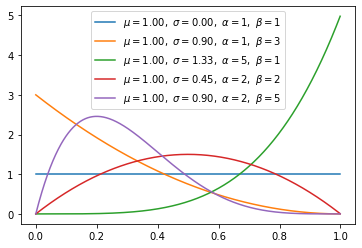

In [1]:
import numpy as np
from matplotlib import pyplot as plt

def gamma_function(n):
    cal = 1
    for i in range(2, n):
        cal *= i
    return cal

def beta(x, a, b):

    gamma = gamma_function(a + b) / \
            (gamma_function(a) * gamma_function(b))
    y = gamma * (x ** (a - 1)) * ((1 - x) ** (b - 1))
    return x, y, np.mean(y), np.std(y)

for ls in [(1,1),(1, 3), (5, 1), (2, 2), (2, 5)]:
    a, b = ls[0], ls[1]

    # x in [0, 1], trial is 1/0.001 = 1000
    x = np.arange(0, 1, 0.001, dtype=np.float64)
    x, y, u, s = beta(x, a=a, b=b)
    plt.plot(x, y, label=r'$\mu=%.2f,\ \sigma=%.2f,'
                         r'\ \alpha=%d,\ \beta=%d$' % (u, s, a, b))
plt.legend()
plt.savefig('../figs/beta.png')
plt.show()

#### Dirichlet 分布/迪利克雷分布（连续）

https://baike.baidu.com/item/%E7%8B%84%E5%88%A9%E5%85%8B%E9%9B%B7%E5%88%86%E5%B8%83/12728892?fr=aladdin

dirichlet 分布又称为多元Beta分布(Multivariate Beta Distribution)，是$\beta$分布在高维情形的推广。如果$k=2$，则为$\beta$分布。

在贝叶斯推断（Bayesian inference）中，狄利克雷分布作为多项分布的共轭先验得到应用。

##### 定义
对独立同分布（idenpendent and identically distributed, iid)的连续随机变量$X\in R^d$ 和支撑集$X\in (0,1)$, $\parallel X\parallel = 1$,若$X$服从Dirchlet分布，则其概率密度函数为：

$Dir(X|\alpha) = \cfrac{1}{B(\alpha)}\prod_{i=1}^d{X_i^{\alpha_i -1}}$

$B(\alpha)= \cfrac{\prod_{i=1}^d{\Gamma(\alpha_i)}}{\Gamma(\alpha_0)},\; \alpha_0 = \sum_{i=1}^d{\alpha_i}, \; d \ge 3$

式中，$\alpha \in \{\alpha_1, \alpha_2, \cdots, \alpha_d\} > 0$是无量纲的分布参数，$\alpha_0$是分布参数的和，$B(\alpha)$是多元Beta函数(multivariate beta function)。

##### 代码


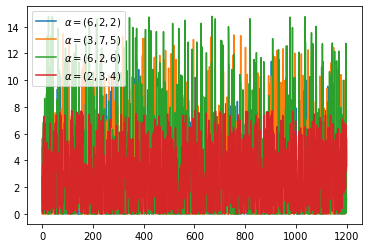

In [3]:
from random import randint
import numpy as np
from matplotlib import pyplot as plt

def normalization(x, s):
    """
    :return: normalizated list, where sum(x) == s
    """
    return [(i * s) / sum(x) for i in x]

def sampling():
    return normalization([randint(1, 100),
            randint(1, 100), randint(1, 100)], s=1)

def gamma_function(n):
    cal = 1
    for i in range(2, n):
        cal *= i
    return cal

def beta_function(alpha):
    """
    :param alpha: list, len(alpha) is k
    :return:
    """
    numerator = 1
    for a in alpha:
        numerator *= gamma_function(a)
    denominator = gamma_function(sum(alpha))
    return numerator / denominator

def dirichlet(x, a, n):
    """
    :param x: list of [x[1,...,K], x[1,...,K], ...], shape is (n_trial, K)
    :param a: list of coefficient, a_i > 0
    :param n: number of trial
    :return:
    """
    c = (1 / beta_function(a))
    y = [c * (xn[0] ** (a[0] - 1)) * (xn[1] ** (a[1] - 1))
         * (xn[2] ** (a[2] - 1)) for xn in x]
    x = np.arange(n)
    return x, y, np.mean(y), np.std(y)

n_experiment = 1200
for ls in [(6, 2, 2), (3, 7, 5), (6, 2, 6), (2, 3, 4)]:
    alpha = list(ls)

    # random samping [x[1,...,K], x[1,...,K], ...], shape is (n_trial, K)
    # each sum of row should be one.
    x = [sampling() for _ in range(1, n_experiment + 1)]

    x, y, u, s = dirichlet(x, alpha, n=n_experiment)
    plt.plot(x, y, label=r'$\alpha=(%d,%d,%d)$' % (ls[0], ls[1], ls[2]))

plt.legend()
plt.savefig('../figs/dirichlet.png')
plt.show()

#### 伽马分布（连续）

##### 定义
假设随机变量X为等到第$\alpha$件事发生所需的等待时间，密度函数为：

$f(x,\beta,\alpha) = \cfrac{\beta^{\alpha}}{\Gamma(\alpha)} x^{\alpha -1}e^{-\beta x},\; x> 0$

令$X\sim \Gamma(\alpha, \beta)$,且令$\lambda = \cfrac{1}{\beta}$, 即 $ X \sim \Gamma(\alpha,\cfrac{1}{\lambda})$

$f(x) = \cfrac{X^{\alpha-1}\lambda^\alpha e^{-\lambda X}}{\Gamma(\alpha)}, \; X>0 $

$\mu = \cfrac{\alpha}{\beta},\; \sigma^2 = \cfrac{\alpha}{\beta^2}$

当$\alpha \le 1$时，$f(x,\beta,\alpha)$为递减函数。

当$\alpha \gt 1$时，$f(x,\beta,\alpha)$为单峰函数。

当$\alpha=1$时，伽马分布就是参数为$\gamma$的指数分布，$X\sim Exp(\gamma)$

当$\alpha=n/2, \beta=1/2$时，伽马分布就是自由度为n的卡方分布，$X\sim \cal{X}^2(\rm n)$

##### Code

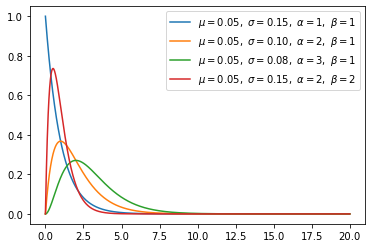

In [5]:
import numpy as np
from matplotlib import pyplot as plt

def gamma_function(n):
    cal = 1
    for i in range(2, n):
        cal *= i
    return cal

def gamma(x, a, b):
    c = (b ** a) / gamma_function(a)
    y = c * (x ** (a - 1)) * np.exp(-b * x)
    return x, y, np.mean(y), np.std(y)

for ls in [(1, 1), (2, 1), (3, 1), (2, 2)]:
    a, b = ls[0], ls[1]

    x = np.arange(0, 20, 0.01, dtype=np.float)
    x, y, u, s = gamma(x, a=a, b=b)
    plt.plot(x, y, label=r'$\mu=%.2f,\ \sigma=%.2f,'
                         r'\ \alpha=%d,\ \beta=%d$' % (u, s, a, b))
plt.legend()
plt.savefig('../figs/gamma.png')
plt.show()

#### 指数分布（连续）

在概率理论和统计学中，**指数分布（也称为负指数分布）是描述泊松过程中的事件之间的时间的概率分布，即事件以恒定平均速率连续且独立地发生的过程**。 

这是伽马分布的一个特殊情况。 它是几何分布的连续模拟，**它具有无记忆的关键性质**。 除了用于分析泊松过程外，还可以在其他各种环境中找到。

当 s,t>0时有P(T>t+s|T>t)=P(T>s)

##### 定义

如果一个随机变量$X$呈指数分布，可以写作$X \sim E(X)$.

令$\theta = \cfrac{1}{\lambda}$,因此概率密度函数:

$ f(x) = \cfrac{1}{\theta}e^{- \cfrac{x}{\theta}},\; x>0$

其中，$\theta \gt 0$为常数，则称X服从参数$\theta$的指数分布。

**指数分布的分布函数：**

$P\{X \le x\} =F(x) = 1-e^{-\cfrac{x}{\theta}}, \; x\gt 0$

**数学期望**

$E(x) = \theta = \cfrac{1}{\lambda} $

**方差**

$D(x) = \theta^2 = \cfrac{1}{\lambda^2} $

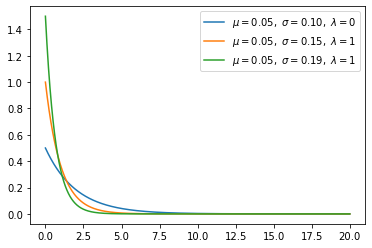

In [1]:
import numpy as np
from matplotlib import pyplot as plt

def exponential(x, lamb):
    y = lamb * np.exp(-lamb * x)
    return x, y, np.mean(y), np.std(y)

for lamb in [0.5, 1, 1.5]:

    x = np.arange(0, 20, 0.01, dtype=np.float)
    x, y, u, s = exponential(x, lamb=lamb)
    plt.plot(x, y, label=r'$\mu=%.2f,\ \sigma=%.2f,'
                         r'\ \lambda=%d$' % (u, s, lamb))
plt.legend()
plt.savefig('../figs/exponential.png')
plt.show()

#### 高斯分布/正态分布（连续）

若随机变量$X$服从一个位置参数为$\mu$, 尺度参数为$\sigma$的概率分布，且其概率密度函数为：

$f(x) = \cfrac{1}{\sqrt{2\pi}\sigma}e^{\left(-\cfrac{(x-\mu)^2}{2\sigma^2}\right)} $

这个随机变量就称为**正态随机变量**,正态随机变量服从的分布就称为**正态分布**,记作$X \sim N(\mu, \sigma^2)$。

常将正态变量作数据转换。将一般正态分布转化成**标准正态分布**。

$ Y = \cfrac{x-\mu}{\sigma} \; \sim N(0,1)$ 

##### Code

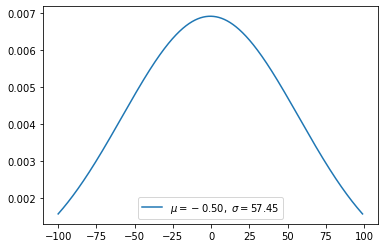

In [2]:
import numpy as np
from matplotlib import pyplot as plt

def gaussian(x, n):
    u = x.mean()
    s = x.std()

    # divide [x.min(), x.max()] by n
    x = np.linspace(x.min(), x.max(), n)

    a = ((x - u) ** 2) / (2 * (s ** 2))
    y = 1 / (s * np.sqrt(2 * np.pi)) * np.exp(-a)

    return x, y, x.mean(), x.std()

x = np.arange(-100, 100) # define range of x
x, y, u, s = gaussian(x, 10000)

plt.plot(x, y, label=r'$\mu=%.2f,\ \sigma=%.2f$' % (u, s))
plt.legend()
plt.savefig('../figs/gaussian.png')
plt.show()

#### 标准正态分布（连续）

##### code

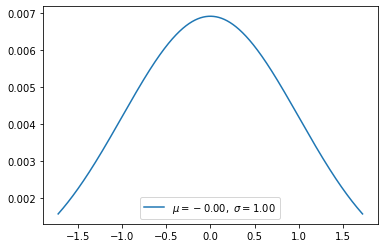

In [3]:
import numpy as np
from matplotlib import pyplot as plt

def normal(x, n):
    u = x.mean()
    s = x.std()

    # normalization
    x = (x - u) / s

    # divide [x.min(), x.max()] by n
    x = np.linspace(x.min(), x.max(), n)

    a = ((x - 0) ** 2) / (2 * (1 ** 2))
    y = 1 / (s * np.sqrt(2 * np.pi)) * np.exp(-a)

    return x, y, x.mean(), x.std()

x = np.arange(-100, 100) # define range of x
x, y, u, s = normal(x, 10000)

plt.plot(x, y, label=r'$\mu=%.2f,\ \sigma=%.2f$' % (u, s))
plt.legend()
plt.savefig('../figs/normal.png')
plt.show()

#### 卡方分布

卡方分布是 β 分布的特例。

若n个相互独立的随机变量$\zeta_1, \zeta_2, \cdots, \zeta_n$, 均服从标准正态分布，则这n个服从标准正态分布的随机变量的平方和

$Q=\sum_{i=1}^n{\zeta_i^2}$ 构成一个新的随机变量，其分布规律为$\cal{X}^2$分布(Chi-squared distribution)。

其中参数$\cal{v}$称为**自由度**，记为$Q\sim\cal{X}^2(\cal{v})$。$\cal{v} = n-k, \;k$ 为限制条件数。

概率密度函数:

$f(x) = \cfrac{1}{2^{n/2}\Gamma(n/2)}x^{\cfrac{n}{2}-1}e^{-x/2},\; x>0$

当自由度很大时，$\cal{X}^2$分布近似为正态分布。

$E(\cal{X}^2) = \cal{v}$

$D(\cal{X}^2) = 2\cal{v}$

##### code

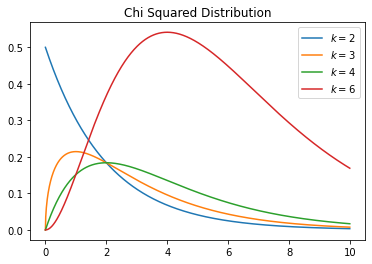

In [4]:
import numpy as np
from matplotlib import pyplot as plt

def gamma_function(n):
    cal = 1
    for i in range(2, n):
        cal *= i
    return cal

def chi_squared(x, k):

    c = 1 / (2 ** (k/2)) * gamma_function(k//2)
    y = c * (x ** (k/2 - 1)) * np.exp(-x /2)

    return x, y, np.mean(y), np.std(y)

for k in [2,3,4,6]:
    x = np.arange(0, 10, 0.01, dtype=np.float64)
    x, y, _, _ = chi_squared(x, k)
    plt.plot(x, y, label=r'$k=%d$' % (k))

plt.title("Chi Squared Distribution")
plt.legend()
plt.savefig('../figs/chi-squared.png')
plt.show()

#### $t$分布（连续）

t分布是对称的钟形分布，与正态分布类似，但尾部较重，这意味着它更容易产生远低于平均值的值。

在概率论和统计学中，**t-分布（t-distribution）用于根据小样本来估计呈正态分布且方差未知的总体的均值**。如果总体方差已知（例如在样本数量足够多时），则应该用正态分布来估计总体均值。

由于在实际工作中，往往$\sigma$是未知的，常用$s$作为$\sigma$的估计值，为了与$\mu$变换区别，称为$t$变换，统计量$t$ 值的分布称为$t$分布。

##### 定义

假设$X\sim N(0,1),\; Y\sim\cal{X}^2$,那么$Z=\cfrac{X}{\sqrt{\cfrac{Y}{n}}}$的分布称为自由度为n的t分布,记为$Z\sim t(n)$。

分布密度函数为

$f_Z(x) = \cfrac{\Gamma(\cfrac{n+1}{2})}{\sqrt{n\pi}\Gamma(\cfrac{n}{2})}\left(1+\cfrac{x^2}{n}\right)^{-\cfrac{n+1}{2}}$

##### code

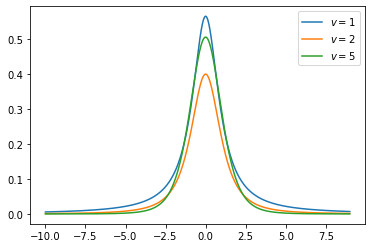

In [5]:
import numpy as np
from matplotlib import pyplot as plt

def gamma_function(n):
    cal = 1
    for i in range(2, n):
        cal *= i
    return cal

def student_t(x, freedom, n):

    # divide [x.min(), x.max()] by n
    x = np.linspace(x.min(), x.max(), n)

    c = gamma_function((freedom + 1) // 2) \
        / np.sqrt(freedom * np.pi) * gamma_function(freedom // 2)
    y = c * (1 + x**2 / freedom) ** (-((freedom + 1) / 2))

    return x, y, np.mean(y), np.std(y)

for freedom in [1, 2, 5]:

    x = np.arange(-10, 10) # define range of x
    x, y, _, _ = student_t(x, freedom=freedom, n=10000)
    plt.plot(x, y, label=r'$v=%d$' % (freedom))

plt.legend()
plt.savefig('../figs/student_t.png')
plt.show()

